# Introduction

For this project, we're working with a fictional e-learning company that offers courses on programming to determine the best two markets to advertise their product in.

# Data Collection

We could start off by creating surveys for a couple of different markets, but that can be a pretty costly endeavor, so let's see if there are any cheaper alternatives out there to get a feel for the market.

Turns out, we can use the data from freeCodeCamp's 2017 New Coder Survey. Since freeCodeCamp is an e-learning platform as well, their survey could provide us with some good directions in which two markets we should target our product.

Please see below for the links to information on freeCodeCamp's survey as well as the Github repo for the survey data:

More information on freeCodeCamp's New Coder Survey (note that this article is for 2018, but we can still use the 2017 dataset for our purposes): https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/

Github Repository with survey data: https://github.com/freeCodeCamp/2017-new-coder-survey

With that, let's get crackin' on reading in our data!

In [1]:
# import our needed libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read in our survey dataset
survey_2017_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv",low_memory=False)

# let's see the number of rows and columns
survey_2017_data.shape

(18175, 136)

In [2]:
# Let's look at hte first 5 rows of data
survey_2017_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Pull all of the columns to analyze what may be useful for our analysis
survey_2017_data.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

# Initial Impressions of Dataset
From looking at the survey dataset, I noticed the following off the bat:
- 18175 rows of data (survey participants)
- 136 columns (entries) for each survey participant

# Digging further into our dataset
We're ultimately trying to answer questions about a population of new coders that would be interested in our courses. From Dataquest, we want to know the following:
- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

That said, we also need to clarify whether our sample data is representative of our population of interest and that it has the information that we need to answer the above questions.

In [4]:
# Let's figure out if our sample is representative of our population of interest first
# We'll generate a frequency distribution of the JobRoleInterest column
# First, let's see what kind of values we're dealing with for one of the JobRoleInterest columns
survey_2017_data["JobRoleInterest"].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                      11.770595
  Front-End Web Developer                                                                                                                                                                                                      6.435927
  Data Scientist                                                                                                                                                                                                               2.173913
Back-End Web Developer                                                                                                                                                                                                         2.030892
  Mobile Developer                                                      

In [5]:
# To make it easier for us, let's see how many folks are interested in more than one subject
# We'll do this by checking for a "," in the entry, which would show us survey participants who entered more than one interest
# Create a copy of the data to add a new column with the entry or "More than 1" if appropriate
survey_2017_data_copy = survey_2017_data.copy()

# From there, create a new column for the JobRoleInterest Rolled Up
survey_2017_data_copy["JobRoleInterest_Rolled_Up"] = survey_2017_data_copy["JobRoleInterest"]

# Now, let's modify those where if JobRoleInterest_Rolled_Up contains a comma, we'll make it "More than 1"
contains_comma = survey_2017_data_copy["JobRoleInterest_Rolled_Up"].str.contains(",",na=False)
survey_2017_data_copy.loc[contains_comma, "JobRoleInterest_Rolled_Up"] = 'More than 1'
survey_2017_data_copy["JobRoleInterest_Rolled_Up"].value_counts(normalize=True) * 100

More than 1                                                                                        68.349542
Full-Stack Web Developer                                                                           11.770595
  Front-End Web Developer                                                                           6.435927
  Data Scientist                                                                                    2.173913
Back-End Web Developer                                                                              2.030892
  Mobile Developer                                                                                  1.673341
Game Developer                                                                                      1.630435
Information Security                                                                                1.315789
  Product Manager                                                                                   0.786613
Data Engineer      

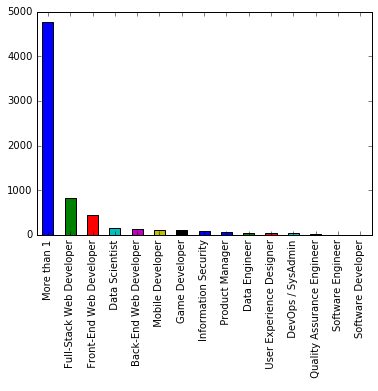

In [6]:
# looking at the top 15 roles
survey_2017_data_copy["JobRoleInterest_Rolled_Up"].value_counts().head(15).plot(kind='bar')

# Where the data skews and how representative is our sample?

From looking at the above, it looks like a majority of around 68% of survey participants are interested in more than one particular subject.

Is this survey representative of our population? We could determine this by calculating the sampling error, which would be the difference between our chosen statistic from the sample and the associated parameter from the population. If there is not that much difference, then we can be confident that this sample is representative.

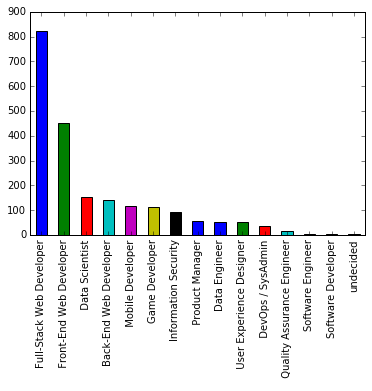

In [7]:
# Looping at the top 15 roles minus those that want to do more than 1 role
exclude_more_than_1 = survey_2017_data_copy["JobRoleInterest_Rolled_Up"]!='More than 1'
survey_2017_data_copy[exclude_more_than_1]["JobRoleInterest_Rolled_Up"].value_counts().head(15).plot(kind='bar')

# Further Analysis - How many folks are interested in Web and Mobile Dev?

Since our fictional e-learning company has a good amount of resources in web and mobile development, let's see how many folks are interested in one or both of the subjects.

In [8]:
# Create a new copy of our survey_2017_data dataset and find those JobInterestRole's that contain "web" or "mobile"
survey_2017_data_copy_2 = survey_2017_data.copy()


# Now, let's modify those where if JobRoleInterest_Rolled_Up contains a comma, we'll make it "More than 1"
survey_2017_data_copy_2["JobRoleInterest"].str.contains("web|mobile",na=False,case=False).value_counts(normalize=True) * 100

False    66.795048
True     33.204952
Name: JobRoleInterest, dtype: float64

# Web and Mobile Dev Analysis Results

It appears that roughly 1/3 of our sample is interested in mobile or web development.

# Country Location of our New Coders Analysis

Next, we want to look at where are our new coders located so we can better place our physical ads. We'll use the CountryLive column since that provides us which country the new coder lives in at the time they took the survey. We'll drop all of the rows where survey participants did not answer what role they were interested in.

In [9]:
# Create a new copy of our survey_2017_data dataset and drop all of those that did not express their interest in any role
survey_2017_data_copy_3 = survey_2017_data.copy()

# see how many nan rows we're working with
survey_2017_data_copy_3["JobRoleInterest"].isna().value_counts()

True     11183
False     6992
Name: JobRoleInterest, dtype: int64

In [10]:
# see how many rows of the dataset we have
survey_2017_data_copy_3.shape

(18175, 136)

## leave out the nan rows!
coding_interest_only = survey_2017_data_copy_3[survey_2017_data_copy_3["JobRoleInterest"].notna()]

# Now, let's generate a frequency distribution table of the countries these folks live in
coding_interest_only["CountryLive"].value_counts()

In [12]:
# Let's also generate an absolute frequency distribution table
coding_interest_only["CountryLive"].value_counts(normalize=True) * 100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

# Results of Country Location Analysis
From our frequency distribution tables above, it looks like USA and India have the largest markets of new coders according to the survey results, so we could decide to market at those two locations and call it a day. 

However, we also want to find out how  much money new coders are willing to spend on e-learning courses.

# How much are new coders willing to spend?

To answer this, we can use the MoneyForLearning columns which tells us in American dollars how much someone has already spent on coding course in the past. Since our fictional company sells subscriptions for $59 a month, we want to find those that would be willing to spend at least that amount per month.

We're also going to focus on new coders who reside in USA, India, the UK, and Canada for the following reasons:
- These countries have the highest absolute frequencies when it comes to country residents
- Our courses are in English, and English is the official language of these four countries. Our ads are more likely to reach new coders who speak English as a result.

First, we'll need to calculate how much a student will spend per month. We'll do that by dividing the MoneyForLearning column by the MonthsProgramming column that tells us how long the survey participant has been coding (as a note, some real newbies have put down that they have 0 MonthsProgramming. To avoid dividing by 0, we'll just divide by 1 for these scenarios).

In [13]:
# we'll make a copy of our coding_interest_only dataset above
coding_interest_only_copy = coding_interest_only.copy()

# Let's limit our data to our countries we mentioned above
potential_target_countries = ['United States of America','India','United Kingdom','Canada']
dataset_with_target_countries = coding_interest_only_copy[coding_interest_only_copy["CountryLive"].isin(potential_target_countries)]

# To avoid a SettingWithCopyWarning, let's copy the above dataset
dataset_with_target_countries_copy = dataset_with_target_countries.copy()

# Next, let's make all of the MonthsProgramming values that are 0 as 1 so we don't run into any division errors
no_programming_exp = dataset_with_target_countries_copy["MonthsProgramming"]==0
dataset_with_target_countries_copy.loc[no_programming_exp,"MonthsProgramming"] = 1

# Now, we'll create a column called avg_monthly_spending where we divide MoneyForLearning by MonthsProgramming 
dataset_with_target_countries_copy["monthly_spending"] = dataset_with_target_countries_copy["MoneyForLearning"] / dataset_with_target_countries_copy["MonthsProgramming"]

# Summary statistics of monthly spending for targeted countries

Below we'll calculate the mean, median, and mode of our "monthly_spending" column for our targeted countries.

## Mean:

In [14]:
# with that column created, let's come up with some summary statistics for each of our target countries for monthly_spending
dataset_with_target_countries_copy.groupby(by='CountryLive')["monthly_spending"].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: monthly_spending, dtype: float64

## Median

In [15]:
# with that column created, let's come up with some summary statistics for each of our target countries for monthly_spending
dataset_with_target_countries_copy.groupby(by='CountryLive')["monthly_spending"].median()

CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
United States of America    3.333333
Name: monthly_spending, dtype: float64

## Mode

In [16]:
# with that column created, let's come up with some summary statistics for each of our target countries for monthly_spending
dataset_with_target_countries_copy.groupby(by='CountryLive').apply(lambda x: x["monthly_spending"].value_counts().index[0])

# reference the following for the above workaround:
# https://stackoverflow.com/questions/22710270/get-maximum-of-value-counts-after-groupby

CountryLive
Canada                      0.0
India                       0.0
United Kingdom              0.0
United States of America    0.0
dtype: float64

# Results of Summary Statistics Analysis

It looks like from the median and mode that most folks prefer to have their coding courses free of charge. With the mean amounts though, it looks like we can still glean that India and USA have coders who are willing to pay the most per month for services. 

## Outlier Analysis

However, there might be some folks who are really willing to spend a lot for courses that could be skewing the average up. Let's see if there are any amounts that are too large (or in the negatives, which would be impossible) to make sure that we are getting accurate means).


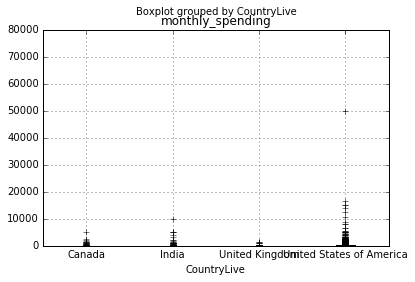

In [17]:
# Create box plots of each of the countries
dataset_with_target_countries_copy.boxplot('monthly_spending',by='CountryLive')

It looks like there is an outlier of 50,000 for the US. Let's look into this data point.

In [21]:
pd.set_option('display.max_columns', 200)
dataset_with_target_countries_copy[dataset_with_target_countries_copy["monthly_spending"]==50000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,trans,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,b84e33311d235660ad1b7a918d7d7df4,b3229f43317af29a4d23734f9d543222,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,English,"single, never married",100000.0,2.0,befcbda814,2017-03-10 23:30:16,2017-03-10 23:26:33,2017-03-10 23:31:50,2017-03-10 23:30:19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,48000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0


It looks like this survey respondent may have confused what they have spent with what they expect for their income as they are both the same. Let's remove this record as a result.

In [26]:
# drop the above outlier
index = dataset_with_target_countries_copy[dataset_with_target_countries_copy["monthly_spending"]==50000].index
dataset_with_target_countries_copy.drop(index,inplace=True)

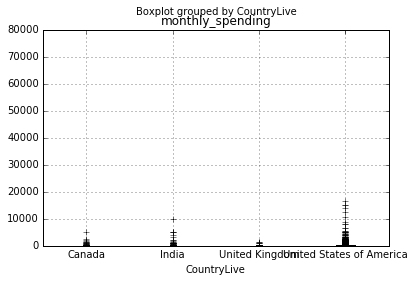

In [27]:
# rerun the box plots
# Create box plots of each of the countries
dataset_with_target_countries_copy.boxplot('monthly_spending',by='CountryLive')

In [31]:
dataset_with_target_countries_copy["monthly_spending"].max()

80000.0

There appears to have been an outlier that I missed of 80,000. Let's dig into this data point further.

In [32]:
dataset_with_target_countries_copy[dataset_with_target_countries_copy["monthly_spending"]==80000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,30000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,20.0,11d884a40e5662ef57566556206b7754,4f77cc788154cb155fb513ece8ea40da,NaN,0.0,0.0,0.0,NaN,I'm already applying,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,work for a nonprofit,0.0,"Back-End Web Developer, Front-End Web Develo...",in an office with other developers,English,"single, never married",80000.0,1.0,b01f8f18a7,2017-03-16 23:14:34,2017-03-16 23:09:32,2017-03-16 23:16:45,2017-03-16 23:14:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Information Technology,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.0


Hmm, this person expects to earn 30,000, and yet they say they have spent 80,000 a month on learning materials so far. Maybe this includes their whole college education? They say they owe 100,000 in student debt, so perhaps this could line up and be a legitimate outlier, and this number just came about because they may have had no experience in programming, and with the way we did our division, it came out to 80,000 a month going forward. Let's exclude this value for now as well.

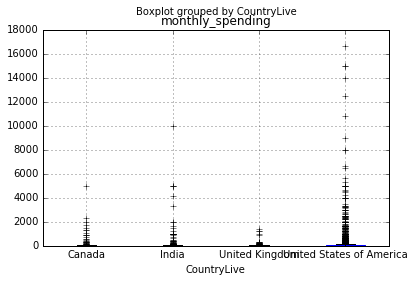

In [36]:
# drop the above outlier
index = dataset_with_target_countries_copy[dataset_with_target_countries_copy["monthly_spending"]==80000].index
dataset_with_target_countries_copy.drop(index,inplace=True)

# rerun the box plots
# Create box plots of each of the countries
dataset_with_target_countries_copy.boxplot('monthly_spending',by='CountryLive')

Oof, there are still a lot of US outliers. Let's look at anything over 6,000 for Us folks.

In [45]:
# analyze the above outliers
us_dataset = dataset_with_target_countries_copy[dataset_with_target_countries_copy["CountryLive"]=='United States of America']
us_dataset[india_dataset["monthly_spending"]>=6000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Six of these respondents stated that they have attended a bootcamp, with two of them saying that they finished. The two that said they finished, though, only have one month of programming under their belt they say. These points do not seem plausible, so I am removing these records. The only ones I am going to keep are rows 718, 1222, 7505, and 9778 since these folks have stated that they attended a boot camp but they have not yet finished it.

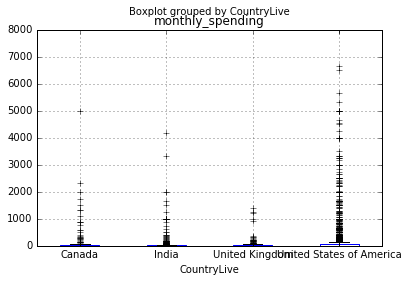

In [46]:
index = [3184,3930,6805,7198,16650,16997,17231]
dataset_with_target_countries_copy.drop(index,inplace=True)

# rerun the box plots
# Create box plots of each of the countries
dataset_with_target_countries_copy.boxplot('monthly_spending',by='CountryLive')

With that, let's hone in on the other three countries and see if they have outliers, starting with India.

In [35]:
dataset_with_target_countries_copy[dataset_with_target_countries_copy["CountryLive"]=='India']["monthly_spending"].value_counts().sort_index(ascending=False)

10000.000000      1
5000.000000       3
4166.666667       1
3333.333333       1
2000.000000       2
1666.666667       1
1500.000000       1
1250.000000       1
1000.000000       8
875.000000        1
750.000000        1
625.000000        1
500.000000        2
416.500000        1
400.000000        2
375.000000        1
370.000000        1
333.333333        2
300.000000        1
275.000000        1
250.000000        2
200.000000        2
195.000000        1
187.500000        1
166.666667        8
150.000000        2
142.857143        1
133.333333        2
125.000000        3
120.000000        1
               ... 
6.250000          1
6.000000          1
5.555556          3
5.500000          1
5.392857          1
5.000000          3
4.857143          1
4.736842          1
4.444444          1
4.166667          7
4.000000          3
3.846154          1
3.750000          1
3.333333          5
3.000000          1
2.777778          4
2.500000          3
2.222222          1
2.083333          1


For the above, we have one person saying they have spent 10,000 per month and 3 with 5,000 per month. Let's look into these further.

In [38]:
# analyze the above outliers
india_dataset = dataset_with_target_countries_copy[dataset_with_target_countries_copy["CountryLive"]=='India']
india_dataset[india_dataset["monthly_spending"]>=5000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,N

Hmm, these at first look somewhat plausible in that each of these folks have college degrees, and they each said they spent between 5,000 and 20,000 on learning already. However, since they all earned or are earning technical degrees like Computer Science and Engineering, I find it hard to believe that they have 4 or less months of programming. As a result, I'm going to remove these outliers.

Also, as a note, the question for MoneyForLearning stated "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?" These respondents may have been confused by the question and included their college tuition.

In [41]:
# drop the above outlier
index = india_dataset[india_dataset["monthly_spending"]>=5000].index
dataset_with_target_countries_copy.drop(index,inplace=True)

With India's outliers deleted, let's look and see if Canada has any unusual outliers.

In [43]:
dataset_with_target_countries_copy[dataset_with_target_countries_copy["CountryLive"]=='Canada']["monthly_spending"].value_counts().sort_index(ascending=False)

5000.000000      1
2337.166667      1
2000.000000      1
1750.000000      1
1500.000000      1
1333.333333      2
1100.000000      1
900.000000       1
888.888889       1
866.666667       1
772.727273       1
583.333333       2
500.000000       1
416.666667       1
375.000000       1
333.333333       1
325.000000       1
300.000000       1
277.777778       2
266.666667       1
250.000000       1
208.333333       1
166.666667       1
150.000000       1
133.333333       2
125.000000       2
100.000000       1
83.333333        3
70.000000        1
66.666667        1
              ... 
20.833333        1
20.000000        5
16.666667        3
15.000000        1
14.285714        1
13.888889        3
13.333333        1
12.500000        3
10.000000        1
9.285714         1
8.333333         4
8.000000         1
6.666667         1
6.250000         1
6.000000         1
5.555556         1
5.000000         3
4.166667         3
4.000000         2
3.750000         2
3.333333         2
3.076923    

Not too shabby Canada. We'll look at that 5,000 one though.

In [48]:
# analyze the above outliers
canada_dataset = dataset_with_target_countries_copy[dataset_with_target_countries_copy["CountryLive"]=='Canada']
canada_dataset[canada_dataset["monthly_spending"]>=5000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier attended a boot camp but they haven't finished yet, so this seems like a plausible outlier. No deletions needed.

Finally, let's look at the UK.

In [49]:
dataset_with_target_countries_copy[dataset_with_target_countries_copy["CountryLive"]=='United Kingdom']["monthly_spending"].value_counts().sort_index(ascending=False)

1400.000000      1
1250.000000      1
1200.000000      1
1000.000000      1
936.750000       1
357.142857       1
333.333333       1
307.692308       1
285.714286       1
250.000000       1
225.000000       1
208.333333       1
200.000000       3
185.714286       1
178.571429       1
166.666667       3
125.000000       3
100.000000       5
90.909091        1
86.666667        1
83.333333        3
70.000000        1
66.666667        5
60.000000        4
58.333333        1
55.000000        1
50.000000        4
42.857143        1
41.666667        1
40.000000        3
              ... 
12.500000        4
11.666667        1
11.111111        5
10.833333        1
10.000000        4
8.333333         6
7.000000         1
6.000000         4
5.555556         2
5.000000         1
4.642857         1
4.333333         1
4.166667         2
4.000000         1
3.900000         1
2.941176         1
2.777778         1
2.500000         4
2.222222         1
2.083333         1
1.666667         2
1.041667    

Nothing too out of the ordinary. As a result, let's re-examine our new means below:

In [50]:
# with that column created, let's come up with some summary statistics for each of our target countries for monthly_spending
dataset_with_target_countries_copy.groupby(by='CountryLive')["monthly_spending"].mean()

CountryLive
Canada                      113.510961
India                        81.812102
United Kingdom               45.534443
United States of America    152.434378
Name: monthly_spending, dtype: float64

# Results of Outlier Analysis
Well would you look at that. Canada ends up coming out on top over India! But does that mean that we should just go for Canada? USA looks like agiven with how many new coders there are and the mean amount spent per month on learning. However, from above, we see that India has almost double the new coders of Canada, so although the survey respondents from India are likely to spend less individually than the Canadian survey respondents, the greater number could mean higher revenues for us.

With that, we could perhaps spend half of our marketing budget on USA and the other half split between India and Canada. We could also just market USA only since there is a large pool of new coders to reach.

# Conclusion

In this project, we looked at a sample of new coders' survey responses to see which markets we should advertise our coding courses in.

Thank you for reading, and until next time!